In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# metadata 
print(glass_identification.metadata) 
  
# variable information 
print(glass_identification.variables) 


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

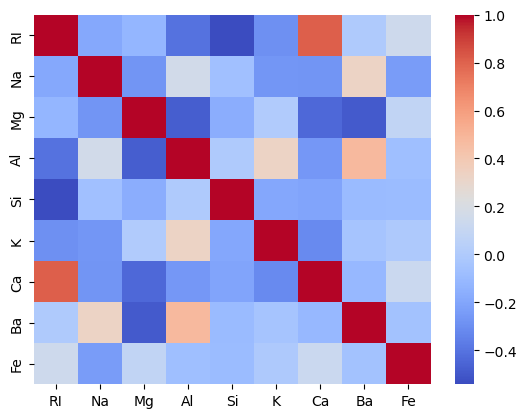

In [5]:
import matplotlib.pyplot as plt
type(X)
c = X.corr()
c
import seaborn as sns
sns.heatmap(c, cmap = "coolwarm")
plt.show()

<Axes: xlabel='Type_of_glass'>

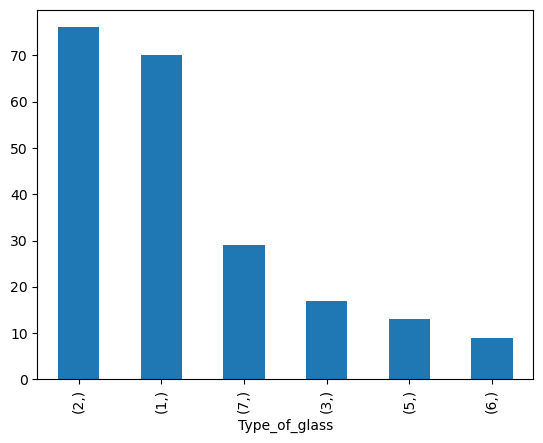

In [6]:
y.value_counts().plot.bar()

In [7]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
y

,Type_of_glass
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# DecisionTreeClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
from sklearn.metrics import accuracy_score
prediction = model.predict(x_test)
prediction

array([1, 7, 2, 7, 2, 2, 1, 2, 2, 3, 6, 5, 1, 2, 6, 5, 7, 1, 1, 6, 1, 7,
       7, 7, 3, 3, 1, 1, 6, 1, 2, 2, 2, 2, 2, 7, 5, 2, 1, 2, 3, 7, 3, 1,
       2, 2, 2, 2, 5, 2, 1, 1, 3, 2, 1, 2, 7, 1, 5, 2, 1, 2, 1, 7, 2, 2,
       3, 6, 6, 1, 2], dtype=int64)

In [13]:
                                                     # Accuracy Score
accuracy = accuracy_score(y_test, prediction)
print("The accuracy of model is", accuracy)

The accuracy of model is 0.6619718309859155


In [14]:
                                                    # Classification report
from sklearn.metrics import classification_report
#target_names=['SEKER', 'ODERMASON','A', 'B', 'C','D','E']
print(classification_report(y_test, prediction)) #,target_names=target_names))

              precision    recall  f1-score   support

           1       0.72      0.59      0.65        22
           2       0.60      0.60      0.60        25
           3       0.14      0.25      0.18         4
           5       0.80      0.67      0.73         6
           6       0.67      1.00      0.80         4
           7       1.00      1.00      1.00        10

    accuracy                           0.66        71
   macro avg       0.66      0.68      0.66        71
weighted avg       0.69      0.66      0.67        71



In [15]:
                                                        #Confusion Metrix
from sklearn.metrics import confusion_matrix as cm
cm=cm(y_test,prediction,labels=[0,1,2,3,4,5,6])
cm

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  6,  3,  0,  0,  0],
       [ 0,  5, 15,  3,  0,  1,  1],
       [ 0,  0,  3,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  4,  1],
       [ 0,  0,  0,  0,  0,  0,  4]], dtype=int64)

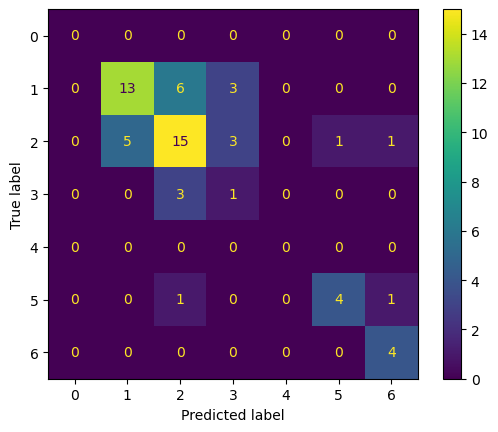

In [16]:
                                                        # Plot Confusion Metrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#labels=['Ca','Os','Ts','Ys','Us','Ms','Bs']
disp = ConfusionMatrixDisplay(confusion_matrix=cm)  #,display_labels=labels
disp.plot()

plt.show()

# SVM

In [17]:
from sklearn import svm

In [18]:
s = svm.SVC( kernel="linear", C = 10 , gamma="auto")
s.fit(x_train,y_train)

c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma='auto', kernel='linear')

In [19]:
from sklearn.metrics import accuracy_score
prediction1 = s.predict(x_test)
prediction1

array([1, 7, 1, 7, 2, 2, 1, 1, 1, 2, 5, 2, 1, 2, 6, 5, 2, 1, 2, 6, 2, 7,
       7, 7, 2, 2, 1, 1, 5, 1, 2, 2, 2, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1, 2,
       1, 6, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 7, 1, 2, 1, 2, 2, 2, 7, 2, 2,
       1, 6, 6, 1, 2], dtype=int64)

In [20]:
                                                     # Accuracy Score
accuracy1 = accuracy_score(y_test, prediction1)
print("The accuracy of model is", accuracy1)

The accuracy of model is 0.676056338028169


In [21]:
                                                    # Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           1       0.67      0.73      0.70        22
           2       0.59      0.68      0.63        25
           3       0.00      0.00      0.00         4
           5       0.75      0.50      0.60         6
           6       0.60      0.75      0.67         4
           7       1.00      0.90      0.95        10

    accuracy                           0.68        71
   macro avg       0.60      0.59      0.59        71
weighted avg       0.65      0.68      0.66        71



c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
                                                        #Confusion Metrix
from sklearn.metrics import confusion_matrix as cm
cm1=cm(y_test,prediction1,labels=[0,1,2,3,4,5,6])
cm1

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  6,  0,  0,  0,  0],
       [ 0,  6, 17,  0,  0,  0,  2],
       [ 0,  2,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  1,  3]], dtype=int64)

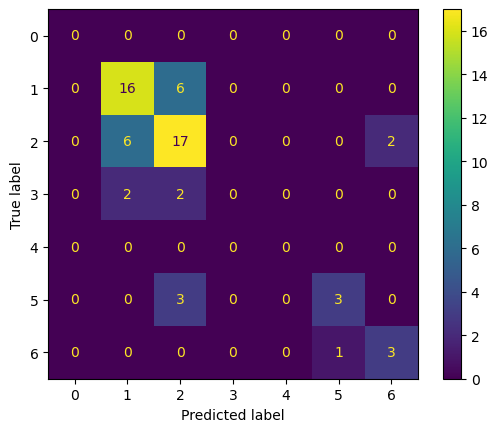

In [23]:
                                                        # Plot Confusion Metrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#labels=['Ca','Os','Ts','Ys','Us','Ms','Bs']
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)  #,display_labels=labels
disp.plot()

plt.show()

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=10)
clf.fit(x_train, y_train)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_17568\2408798182.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=2, random_state=10)

In [40]:
prediction2 = clf.predict(x_test)
from sklearn.metrics import accuracy_score
prediction2

array([1, 7, 1, 7, 2, 1, 1, 2, 2, 2, 7, 2, 1, 2, 7, 2, 7, 1, 1, 7, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 7, 2, 1, 1, 2, 2, 7, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 7, 2, 2,
       1, 1, 7, 1, 2], dtype=int64)

In [41]:
                                                     # Accuracy Score
accuracy2 = accuracy_score(y_test, prediction2)
print("The accuracy of model is", accuracy2)

The accuracy of model is 0.5915492957746479


In [42]:
                                                    # Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           1       0.58      0.82      0.68        22
           2       0.56      0.60      0.58        25
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         4
           7       0.69      0.90      0.78        10

    accuracy                           0.59        71
   macro avg       0.30      0.39      0.34        71
weighted avg       0.47      0.59      0.52        71



c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
                                                        #Confusion Metrix
from sklearn.metrics import confusion_matrix as cm
cm2=cm(y_test,prediction2,labels=[0,1,2,3,4,5,6])
cm2

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  4,  0,  0,  0,  0],
       [ 0, 10, 15,  0,  0,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]], dtype=int64)

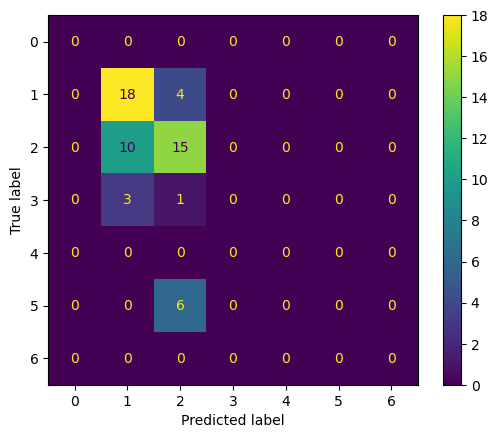

In [44]:
                                                        # Plot Confusion Metrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#labels=['Ca','Os','Ts','Ys','Us','Ms','Bs']
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)  #,display_labels=labels
disp.plot()

plt.show()